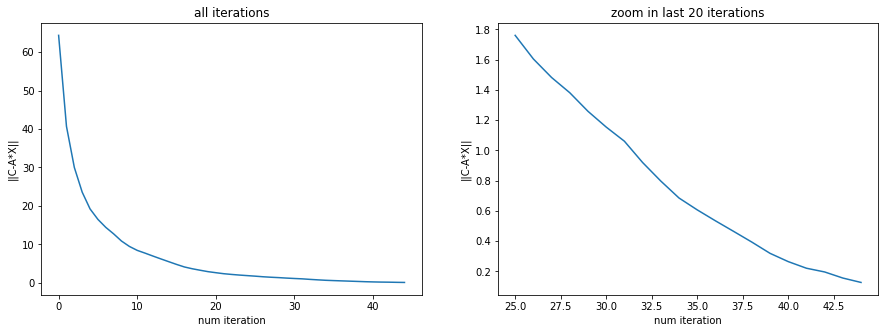

random state = 1, relative error = 0.84



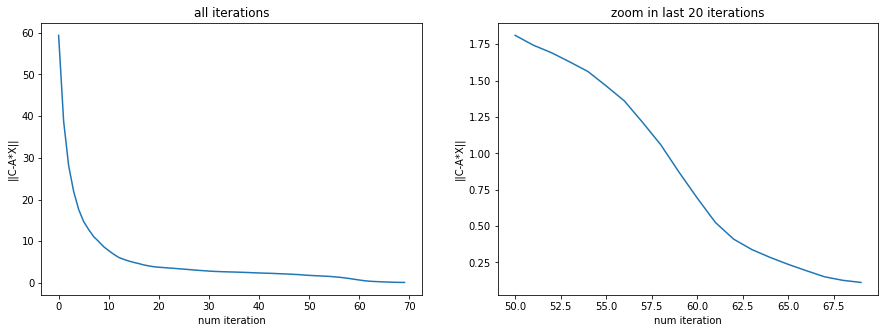

random state = 21, relative error = 1.04



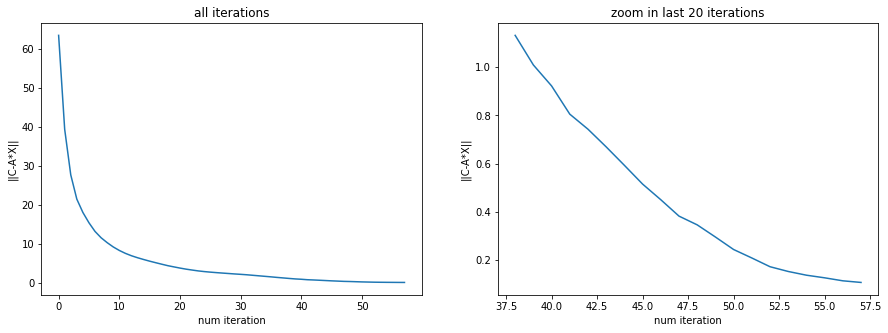

random state = 123, relative error = 0.88



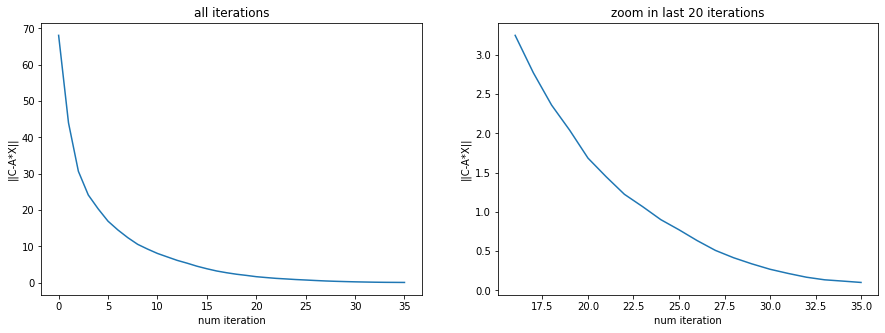

random state = dct, relative error = 0.77



In [1]:
%run LSQR-Mprod.ipynb

In [2]:
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
img = mpimg.imread('cat.jpg')
img.shape

(256, 256, 3)

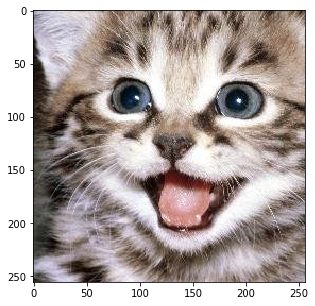

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(img, interpolation='nearest')
plt.show()

# Bluring

In [5]:
alpha, beta, gama = 0.8, 0.1, 0.1

s1, s2 = img.shape[0:2]
# s1, s2=4,4

index_array = np.array([[(i,j) for j in range(s1)]for i in range(s2)])
k_l_matrix = abs(index_array[:,:,0]-index_array[:,:,1])

r = 6
mask = np.zeros((s1,s2), dtype=bool)
mask[k_l_matrix<r] = 1

sigma = 4

A = np.zeros(img.shape)
exp_k_l_matrix = np.zeros((s1, s2))
exp_k_l_matrix[mask] = np.exp(-k_l_matrix[mask]**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
A[:,:,0] = alpha*exp_k_l_matrix
A[:,:,1] = beta*exp_k_l_matrix
A[:,:,2] = gama*exp_k_l_matrix

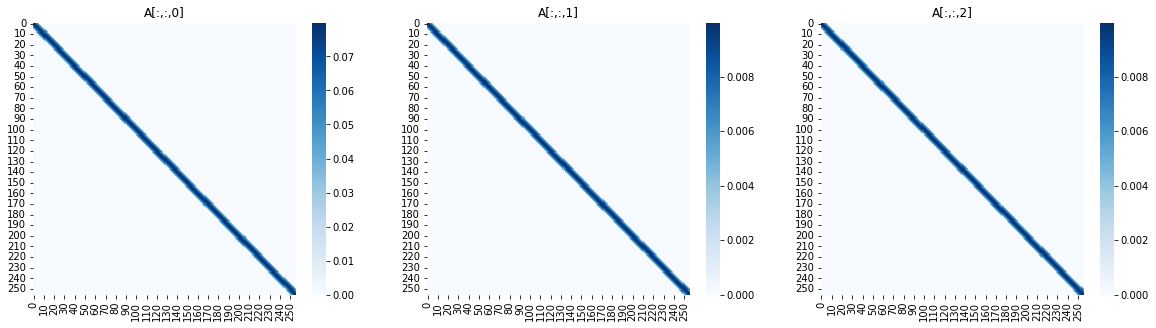

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.heatmap(A[:,:,0], cmap='Blues')
plt.title('A[:,:,0]')
plt.subplot(132)
sns.heatmap(A[:,:,1], cmap='Blues')
plt.title('A[:,:,1]')
plt.subplot(133)
sns.heatmap(A[:,:,2], cmap='Blues')
plt.title('A[:,:,2]')
plt.show()

In [8]:
# B = np.zeros(img.shape)
# # B[:,:,0] = exp_k_l_matrix

# B[:,:,0] = np.eye(256,256)
# B[:,:,1] = np.eye(256,256)
# B[:,:,2] = np.eye(256,256)

In [9]:
# plt.figure(figsize=(20,5))
# plt.subplot(131)
# sns.heatmap(B[:,:,0], cmap='Blues')
# plt.title('B[:,:,0]')
# plt.subplot(132)
# sns.heatmap(B[:,:,1], cmap='Blues')
# plt.title('B[:,:,1]')
# plt.subplot(133)
# sns.heatmap(B[:,:,2], cmap='Blues')
# plt.title('B[:,:,2]')
# plt.show()

In [10]:
funm_dct, invm_dct = generate_dct(3)

# img_blured = m_prod(m_prod(A, img, funm_dct, invm_dct), B, funm_dct, invm_dct)
# img_blured_noisy = img_blured + np.random.randn(img.shape[0], img.shape[1], img.shape[2])

# only bluring 'from the left'

In [11]:
img_blured = m_prod(A, img, funm_dct, invm_dct)
img_blured_noisy = img_blured + np.random.randn(img.shape[0], img.shape[1], img.shape[2])

In [12]:
def normalize(X):
    return (X-X.min())/(X.max()-X.min())

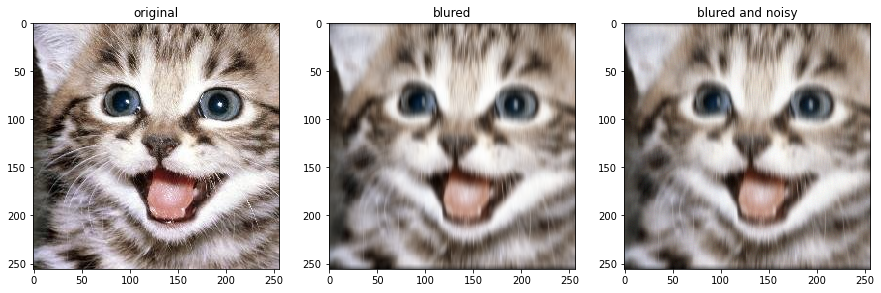

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(132)
plt.imshow(normalize(img_blured), interpolation='nearest')
plt.title('blured')
plt.subplot(133)
plt.imshow(normalize(img_blured_noisy), interpolation='nearest')
plt.title('blured and noisy')
plt.show()

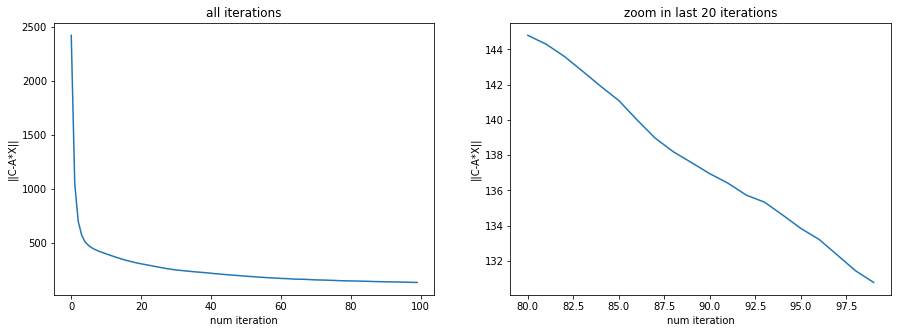

In [14]:
X_restored = LSQR_mprod(A, img_blured_noisy, funm_dct, invm_dct, show_conv=True, itermax=100)

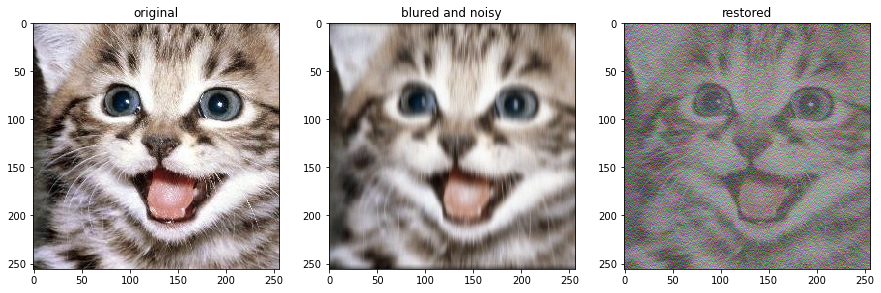

relative error = 7.33


In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(133)
plt.imshow(normalize(X_restored), interpolation='nearest')
plt.title('restored')
plt.subplot(132)
plt.imshow(normalize(img_blured_noisy), interpolation='nearest')
plt.title('blured and noisy')
plt.show()

rel_error = tensor_frob_norm(X_restored-img)/tensor_frob_norm(img)
print(f'relative error = {round(rel_error, 2)}')

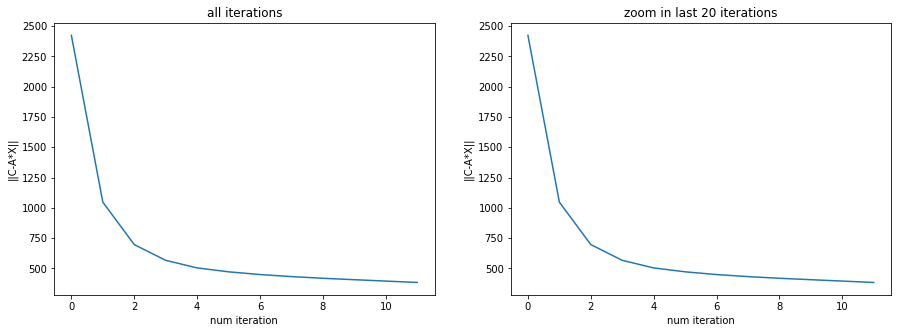

In [16]:
X_restored = LSQR_mprod(A, img_blured_noisy, funm_dct, invm_dct, show_conv=True, itermax=12)

# DCT

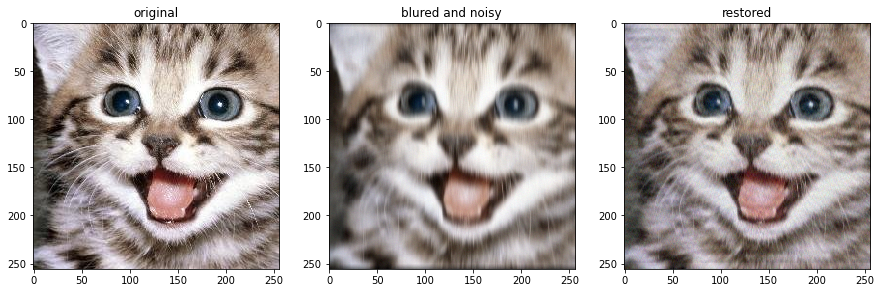

relative error = 1.37


In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(133)
plt.imshow(normalize(X_restored), interpolation='nearest')
plt.title('restored')
plt.subplot(132)
plt.imshow(normalize(img_blured_noisy), interpolation='nearest')
plt.title('blured and noisy')
plt.show()

rel_error = tensor_frob_norm(X_restored-img)/tensor_frob_norm(img)
print(f'relative error = {round(rel_error, 2)}')

# random unitary M

In [24]:
funm_dct, invm_dct = generate_haar(3, random_state=121)
img_blured = m_prod(A, img, funm_dct, invm_dct)
img_blured_noisy = img_blured + np.random.randn(img.shape[0], img.shape[1], img.shape[2])

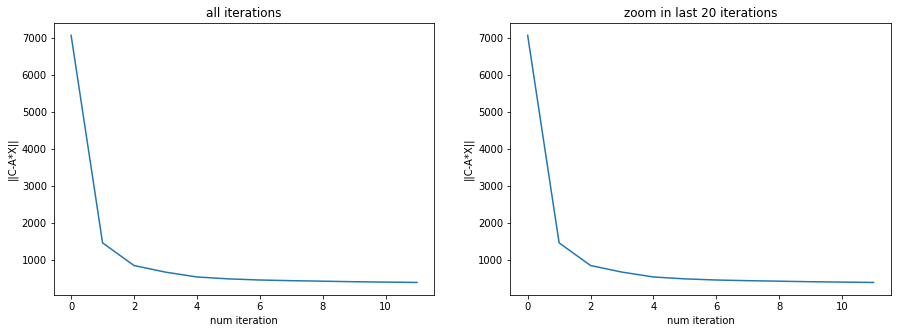

In [37]:
X_restored = LSQR_mprod(A, img_blured_noisy, funm_dct, invm_dct, show_conv=True, itermax=12)

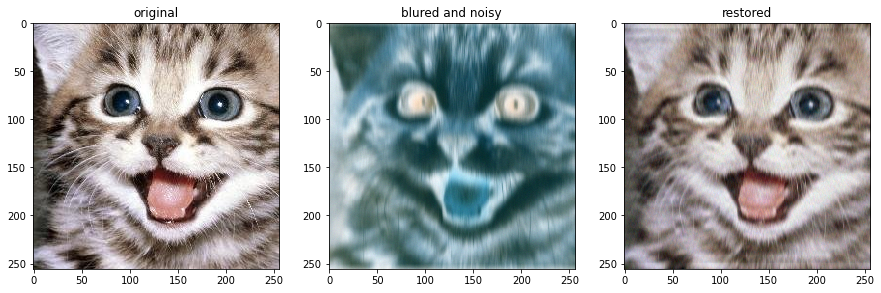

relative error = 1.46


In [38]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(133)
plt.imshow(normalize(X_restored), interpolation='nearest')
plt.title('restored')
plt.subplot(132)
plt.imshow(normalize(img_blured_noisy), interpolation='nearest')
plt.title('blured and noisy')
plt.show()

rel_error = tensor_frob_norm(X_restored-img)/tensor_frob_norm(img)
print(f'relative error = {round(rel_error, 2)}')

In [61]:
img = mpimg.imread('saturn.jpg')
img.shape

(256, 256, 3)

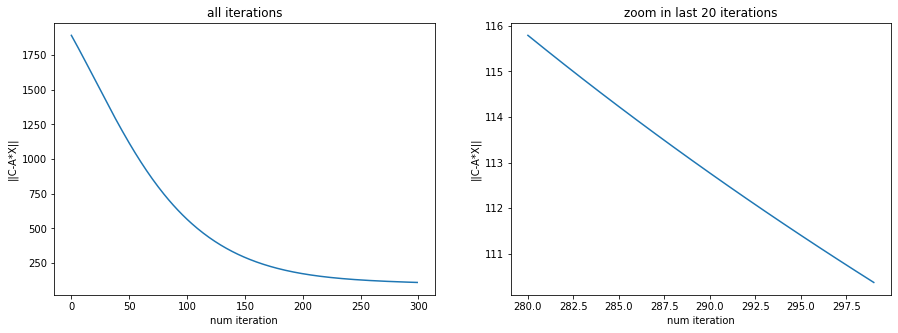

In [63]:
funm_dct, invm_dct = generate_dct(3)
X_restored = LSQR_mprod(A, img, funm_dct, invm_dct, show_conv=True, itermax=300)

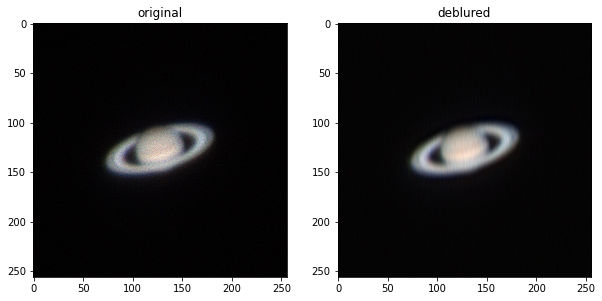

relative error = 8.99


In [64]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(122)
plt.imshow(normalize(X_restored), interpolation='nearest')
plt.title('deblured')
plt.show()

rel_error = tensor_frob_norm(X_restored-img)/tensor_frob_norm(img)
print(f'relative error = {round(rel_error, 2)}')

In [83]:
img = mpimg.imread('arch.jpeg')
img.shape

(562, 611, 3)

In [84]:
img = img[:,:562]

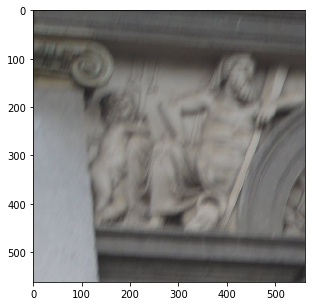

In [85]:
plt.figure(figsize=(5,5))
plt.imshow(img, interpolation='nearest')
plt.show()

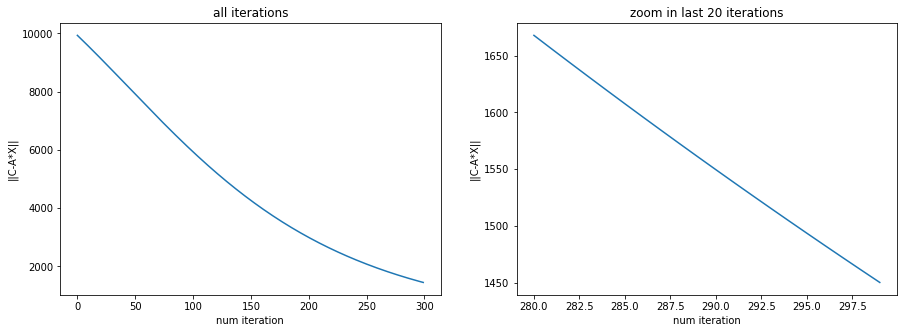

In [91]:
funm_dct, invm_dct = generate_dct(3)

alpha, beta, gama = 0.8, 0.1, 0.1

s1, s2 = img.shape[0:2]
# s1, s2=4,4

index_array = np.array([[(i,j) for j in range(s2)]for i in range(s1)])
k_l_matrix = abs(index_array[:,:,0]-index_array[:,:,1])

r = 6
mask = np.zeros((s1,s2), dtype=bool)
mask[k_l_matrix<r] = 1

sigma = 2

A = np.zeros(img.shape)
exp_k_l_matrix = np.zeros((s1, s2))
exp_k_l_matrix[mask] = np.exp(-k_l_matrix[mask]**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
A[:,:,0] = alpha*exp_k_l_matrix
A[:,:,1] = beta*exp_k_l_matrix
A[:,:,2] = gama*exp_k_l_matrix


X_restored = LSQR_mprod(A, img, funm_dct, invm_dct, show_conv=True, itermax=300)

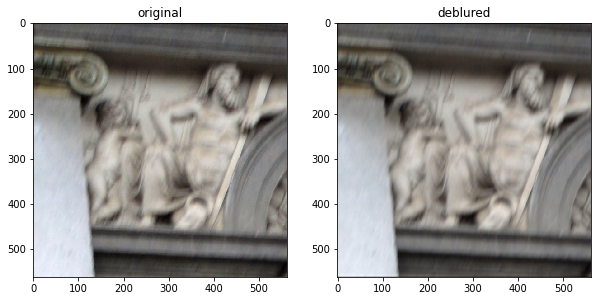

relative error = 4.51


In [92]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(normalize(img), interpolation='nearest')
plt.title('original')
plt.subplot(122)
plt.imshow(normalize(X_restored), interpolation='nearest')
plt.title('deblured')
plt.show()

rel_error = tensor_frob_norm(X_restored-img)/tensor_frob_norm(img)
print(f'relative error = {round(rel_error, 2)}')

In [93]:
totalPopulation = 50 
growthFactor = 1.00005
dayCount = 0 #Every 2 months the population is reported
while totalPopulation < 1000000:
    totalPopulation *= growthFactor
    #Every 56th day, population is reported
    dayCount += 1
    if dayCount == 56: 
        dayCount = 0
        print(totalPopulation)

50.14019267336515
50.28077842644361
50.421758361373264
50.5631335833823
50.704905200797775
50.847074325054315
50.98964207070282
51.13260955541927
51.27597790001347
51.41974822843774
51.563921667795874
51.70849934835185
51.85348240353876
51.99887196996765
52.14466918743647
52.290875198939005
52.43749115067384
52.5845181920533
52.731957475712534
52.87981015751845
53.028077396578915
53.17676035525173
53.325860199153716
53.47537809717
53.62531522146305
53.775672747481956
53.92645185397153
54.0776537229816
54.22927953987637
54.38133049334356
54.533807775403844
54.68671258142016
54.840046110106975
54.993809563539834
55.14800414716474
55.302631069807575
55.45769154368362
55.613186784406984
55.769118011000224
55.92548644590379
56.082293314985726
56.239539847551235
56.39722727635229
56.55535683759732
56.71392977096098
56.87294731959368
57.032410730131446
57.19232125270578
57.35268014095325
57.51348865202554
57.67474804659919
57.83645958888546
57.998624546640265
58.161244191174156
58.32431979736